# Moving average
lev_l values have large measurement errors. To avoid predicting errors, we should replace measured raw values by moving average.
#### To fix
- size of window to calculate average
- Null management

[See ISSUE](https://github.com/hiroshi-kuriyama/rail_level_gap/issues/4)

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
input_dir = '../input/'
working_dir = '../working/'
output_dir = '../output/'

## Read data

In [3]:
def read_track(line_name='a'):
    track_df = pd.read_csv(os.path.join(input_dir, 'track_{}.csv'.format(line_name.upper())))
    col_names_track = ['date', 'kilo', 'lev_l', 'lev_r', 'cur_l', 'cur_r', 'cant', 'width', 'speed']
    track_df.columns = col_names_track
    track_df['date'] = pd.to_datetime(track_df['date'])
    print('track_{line_name} shape: {shape}'.format(line_name=line_name.upper(), shape=track_df.shape))
    return track_df

In [4]:
sleeper_type_dict = {
    1: 'pc',
    2: 'wooden',
    3: 'junction',
    4: 'short',
    5: 'synthetic',
    6: 'synth_junc',
    7: 'symth_short',
    8: 'other'
}

In [5]:
def read_equ(line_name='a'):
    equ_df = pd.read_csv(os.path.join(input_dir, 'equipment_{}.csv'.format(line_name.upper())))
    col_names_equ = ['kilo', 'is_ballast', 'is_long', 'sleeper_type', 'is_bridge', 'is_crossing', 'gross_ton', 'radius', 'is_unreliable']
    equ_df.columns = col_names_equ
    equ_df['sleeper_type'] = equ_df['sleeper_type'].replace(sleeper_type_dict)
    print('equ_{line_name} shape: {shape}'.format(line_name=line_name.upper(), shape=equ_df.shape))
    return equ_df

In [6]:
abcd_list = ['a', 'b', 'c', 'd']
track = {}
equ = {}
for abcd in abcd_list:
    track[abcd] = read_track(abcd)
    equ[abcd] = read_equ(abcd)

track_A shape: (10185690, 9)
equ_A shape: (27906, 9)
track_B shape: (7815753, 9)
equ_B shape: (21531, 9)
track_C shape: (20324660, 9)
equ_C shape: (55684, 9)
track_D shape: (5601687, 9)
equ_D shape: (15691, 9)


In [7]:
lev_df = {}
lev_diff = {}
for abcd in abcd_list:
    # pivot
    lev_df[abcd] = track[abcd].pivot(index='date', columns='kilo', values='lev_l')
    lev_df[abcd].columns = lev_df[abcd].columns.astype('str')

In [51]:
abcd = 'b'
kilo = '11510'
# lev_diff = lev_diff[abcd]

In [52]:
window_r = 21
min_periods_r = 14

In [53]:
lev_df_ma = lev_df[abcd].rolling(window=window_r, min_periods=min_periods_r, center=True, axis=0).mean()
# lev_df_ma.head(10)

In [54]:
equ[abcd].query('kilo=={}'.format(kilo))

,kilo,is_ballast,is_long,sleeper_type,is_bridge,is_crossing,gross_ton,radius,is_unreliable
1510,11510,1,1,pc,0,0,9.223,3000,0


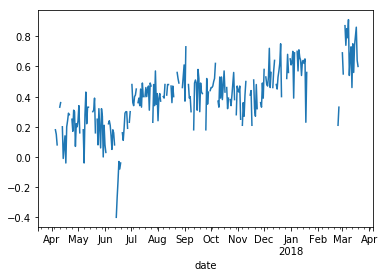

In [55]:
lev_df[abcd][kilo].plot()

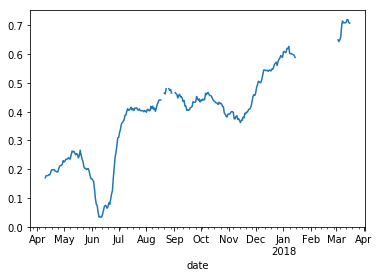

In [56]:
lev_df_ma[kilo].plot()